# A SymPy Primer
---
SymPy is an add-on package to Python for handling symbolic calculations. It is meant to be a fully featured computer algebra system (CAS), similar to Mathematica or Maple. This notebook illustrates some of its basic features.

Table of Contents:
1. [Importing sympy](#section1)
2. [Creating symbol objects](#section2)
3. [Symbol attributes](#section3)
4. [Numbers](#section4)
5. [Functions](#section5)
6. [Manipulating expressions](#section6)
7. [Numerical evaluation](#section7)
8. [Calculus](#section8)
9. [Solving equations](#section9)
10. [Linear algebra](#section10)

## 1. Importing SymPy <a id='section1'></a>

Before using the various commands from the sympy module, you first have to load it.

In [1]:
# load all sympy commands all at once (not recommended)
#from sympy import *

In [2]:
# introduce an alias for the numpy namespace (recommended)
import sympy as sym

In order to display output in an easy-to-read format, we need to add the following line.

In [3]:
sym.init_printing()

## 2. Creating symbol objects <a id='section2'></a>

The basic elements used in sympy calculations are symbol objects, which are instances of the class sympy.Symbols. There are multiple ways to create new sympy.Symbols objects. (From now on, Symbols objects will simply be called symbols.) 

### Symbol( )

In [4]:
# simplest way to create a symbol
x = sym.Symbol("x")
x

In [5]:
# create a symbol with some specified attribute
alpha = sym.Symbol("alpha", real=True)
beta = sym.Symbol("beta", integer=True)
alpha, beta

### symbols( )

In [6]:
# create multiple symbols all at once, using sympy.symbols()
alpha, beta, gamma = sym.symbols("alpha, beta, gamma", positive=True, real=True)
alpha, beta, gamma

In [8]:
# the symbol name does not need to match the symbol
a, b, c = sym.symbols("alpha2, beta2, gamma2")
a, b, c

In [9]:
# the symbol name does not need to be unique
a, b = sym.symbols("alpha3, alpha3")
a, b

### var( )

In [7]:
# create multiple symbols all at once, using sympy.var()
alpha1, beta1, gamma1 = sym.var("alpha1, beta1, gamma1", positive=True, real=True)
alpha1, beta1, gamma1

## 3. Symbol attributes <a id='section3'></a>

In [10]:
alpha = sym.var("alpha", real=True, integer=False, positive=True)

In [11]:
alpha.is_real

True

In [12]:
alpha.is_complex

True

In [13]:
alpha.is_imaginary

False

In [14]:
alpha.is_positive

True

In [15]:
alpha.is_negative

False

In [16]:
alpha.is_zero

False

In [17]:
alpha.is_nonzero

True

In [18]:
alpha.is_even

False

In [19]:
alpha.is_odd

False

In [20]:
alpha.is_integer

False

In [21]:
alpha.is_prime

False

In [22]:
alpha.is_finite

In [23]:
alpha.is_infinite

## 4. Numbers <a id='section4'></a>

SymPy provides its own integer and float classes, sympy.Integer and sympy.Float, respectively. These are distinct from the int and float types in Python. One of the main differences is that sympy.Integer and sympy.Float have arbitrary precision, whereas int and float do not. 

In addition to integers and floats, sympy also provides a class for rational numbers, sympy.Rational.

Finally, sympy provides predefined symbols for various special constants used in mathematics, such as $\pi$ and $e$.

### Integer( )

In [180]:
# this is a python integer
a = 3
type(a)

int

In [181]:
# this is a sympy integer
b = sym.Integer(3)
type(b)

sympy.core.numbers.Integer

In [182]:
# instances of sympy.Integer have the attribute Integer (capital "I"),
# as well as the attribute integer (lower case "i")
b = sym.Integer(8)
b.is_Integer, b.is_integer

(True, True)

In [183]:
# instances of sympy.Symbols with integer=True,
# have the attribute integer (lower case "i"),
# but do NOT have the attribute Integer (capital "I")
c = sym.symbols("c", integer=True)
c.is_integer, c.is_Integer

(True, False)

### Float( )

In [184]:
# this is a python float
a = 3.0
type(a)

float

In [185]:
# this is a sympy float
b = sym.Float(3.0)
type(b)

sympy.core.numbers.Float

In [186]:
# this is a python float to 25 digit precision
a = "%.25f" % 0.3
a

'0.2999999999999999888977698'

In [187]:
# this is a sympy float with 25 digit precision
b = sym.Float('0.3', 25)
b

### Rational( )

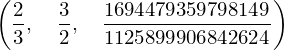

In [188]:
# here are examples of sympy rationals
a = sym.Rational(2, 3)
b = sym.Rational(3, 2)
c = sym.Rational(3.01, 2)
a, b, c

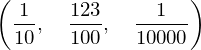

In [189]:
# more examples of sympy rationals
d = sym.Rational('0.1')
e = sym.Rational('1.23')
f = sym.Rational('1e-4')
d, e, f

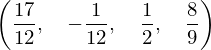

In [190]:
# algebraic operations between sympy rationals preserve the type
a = sym.Rational(2,3)
b = sym.Rational(3,4)
a+b, a-b, a*b, a/b

### Special symbols

In [35]:
# predefined sympy symbol for pi
sym.pi

In [36]:
# predefined sympy symbol for e
sym.E

In [37]:
# predefined sympy symbol for Euler's constant
sym.EulerGamma

In [38]:
# predefined sympy symbol for i
sym.I

In [39]:
# predefined sympy symbol for infinity
sym.oo

## 5. Functions <a id='section5'></a>

Sympy objects that represent functions can be created with sympy.Function( ). User-defined functions can be created with sympy.Lambda( ). Sympy also has a wide variety of predefined functions, such as sympy.sin( ) and sympy.cos( ). 

### Function( )

In [191]:
# create an undefined function with an arbitrary number of input variables
f = sym.Function("f")
f

f

In [192]:
# create an undefined function of one variable
x = sym.symbols("x")
f = sym.Function("f")(x)
f

In [193]:
# create an undefined function of two variables
x, y = sym.symbols("x, y")
f = sym.Function("f")(x, y)
f

### Lambda( )

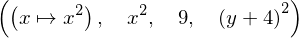

In [70]:
# create a user-defined function
f = sym.Lambda(x, x**2)
f, f(x), f(3), f(y + 4)

### Predefined functions

In [194]:
# sine
sym.sin(x)

In [195]:
#cosine
sym.cos(x)

In [196]:
# log
sym.log(x+1)

In [197]:
# exponential 
sym.exp(-x**2)

## 6. Manipulating Expressions <a id='section6'></a>

Expressions are formed by combining symbols and functions. There are numerous ways of manipulating expressions. Many of these are illustrated in the examples below.

In [105]:
# create an expression
x, y = sym.symbols("x, y")
expr = 1 + 2*x*y + 3*x**2
expr

### simplify( )

In [106]:
# simplify an expression
x = sym.symbols("x")
expr1 = 2*(x**2 - x) - x*(x + 1)
expr2 = sym.simplify(expr1)
expr1, expr2

In [107]:
# another way to simplify an expression
x = sym.symbols("x")
expr1 = 2*(x**2 - x) - x*(x + 1)
expr2 = expr1.simplify()
expr1, expr2

### trigsimp( )

In [108]:
# simplify an expression using trig identities
x = sym.symbols("x")
expr = 2*sym.cos(x)*sym.sin(x)
expr, expr.trigsimp()

### powsimp( )

In [109]:
# simplify an expression using laws of powers
x, y = sym.symbols("x, y")
expr = sym.exp(x)*sym.exp(y)
expr, expr.powsimp()

### ratsimp( )

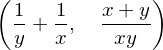

In [110]:
# simplify an expression by combining common denominator
x, y = sym.symbols("x, y")
expr = 1/x + 1/y
expr, expr.ratsimp()

### expand( )

In [111]:
# expand an expression
x = sym.symbols("x")
expr = (1 + x)*(2 + x)
expr, sym.expand(expr)

In [112]:
# another way to expand an expression
x = sym.symbols("x")
expr = (1 + x)*(2 + x)
expr, expr.expand()

In [113]:
# expand a trig expression
x, y = sym.symbols("x, y")
expr = sym.sin(x + y)
expr, expr.expand(trig=True)

In [114]:
# expand a log expression
x, y = sym.symbols("x, y",positive=True)
expr = sym.log(x*y)
expr, expr.expand(log=True)

In [115]:
# separate a complex expression into real and imaginary parts
x, y = sym.symbols("x, y", real=True)
expr = sym.exp(x + y*sym.I)
expr, expr.expand(complex=True)

In [116]:
# expand the base of a power expression
a, b = sym.symbols("a, b", positive=True)
x = sym.symbols("x")
expr = (a*b)**x
expr, expr.expand(power_base=True)

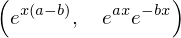

In [117]:
# expand the exponent of a power expression
a, b = sym.symbols("a, b", positive=True)
x = sym.symbols("x")
expr = sym.exp((a - b)*x)
expr, expr.expand(power_exp=True)

### factor( )

In [118]:
# factor an expression
x = sym.symbols("x")
expr = x**2 -1
expr, expr.factor()

### logcombine( )

In [119]:
# combine a log expression
x, y = sym.symbols("x, y",positive=True)
expr = sym.log(x) + sym.log(y)
expr, sym.logcombine(expr)

### collect( )

In [120]:
# collecting terms containing a given symbol
x, y, z = sym.symbols("x, y, z")
expr = x + y + x*y*z
expr, expr.collect(x), expr.collect(y)

### apart( )

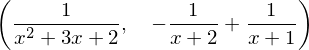

In [122]:
# break a fraction into a partial fraction
x = sym.symbols("x")
expr = 1/(x**2 + 3*x + 2)
expr, expr.apart(x)

### together( )

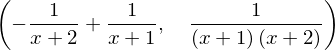

In [123]:
# combine partial fractions into a single fraction
x = sym.symbols("x")
expr = 1/(x + 1) - 1/(x + 2)
expr, expr.together()

### cancel( )

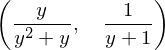

In [124]:
# break a fraction into a partial fraction
x, y = sym.symbols("x, y")
expr = y/(y + y**2)
expr, expr.cancel(y)

### subs( )

In [199]:
# substitute one symbol for another in an expression
x, y = sym.symbols("x, y")
expr = x + 2
expr, expr.subs(x,y)

In [204]:
# make multiple symbol substitutions in an expression
x, y, z = sym.symbols("x, y, z")
a, b, c = sym.symbols("a, b, c")
expr = sym.sin(x) + sym.exp(y) + z
expr, expr.subs({x:a, y:b, z:c})

In [214]:
# make numeric substitutions in an expression
x = sym.symbols("x")
a, b, c = sym.symbols("a, b, c")
expr = a + b*x + c*x**2
params = {a:1.2, b:2, c:-5}
expr, expr.subs(params)

In [215]:
# substitute expressions in an expression
x, y, z = sym.symbols("x, y, z")
expr = sym.sin(x) + sym.exp(y) + z
expr, expr.subs({sym.sin(x): x**2, sym.exp: sym.cos, z: sym.log(x)})

## 7. Numerical evaluation <a id='section7'></a>

### N( )

In [216]:
# evaluate pi 
pi = sym.pi
sym.N(pi)

In [217]:
# evaluate pi to 50 digits 
pi = sym.pi
sym.N(pi, 50)

In [218]:
# evaluate pi in an expression
x = sym.symbols("x")
pi = sym.pi
expr = x + pi
sym.N(expr)

In [219]:
# evaluate a user-defined function
f = sym.Lambda(x, expr)
f, f(x), f(2),  sym.N(f(2))

### evalf( )

In [220]:
# evaluate pi 
pi = sym.pi
pi.evalf()

In [221]:
# evaluate pi to 50 digits 
pi = sym.pi
pi.evalf(50)

In [222]:
# evaluate pi in an expression
x = sym.symbols("x")
pi = sym.pi
expr = x + pi
expr.evalf()

In [223]:
# evaluate a user-defined function
f = sym.Lambda(x, expr)
f, f(x), f(2),  f(2).evalf()

### lambdify( )

In [228]:
# make a user-defined scalar function that will return numerical evaluations
x = sym.symbols("x")
pi = sym.pi
expr = x + pi
g = sym.lambdify(x, expr)
g, g(x), g(2)

(<function numpy.<lambda>>, x + 3.14159265358979, 5.141592653589793)

In [231]:
# make a user-defined vectorized function that will return numerical evaluations
x = sym.symbols("x")
pi = sym.pi
expr = x + pi

f = sym.lambdify(x, expr, 'numpy')
import numpy as np

xvals = np.arange(0,10)

f(xvals)

array([  3.14159265,   4.14159265,   5.14159265,   6.14159265,
         7.14159265,   8.14159265,   9.14159265,  10.14159265,
        11.14159265,  12.14159265])

## 8. Calculus <a id='section8'></a>

### diff( )

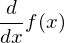

In [265]:
# oridinary derivative of an undefined function in one variable
x = sym.symbols("x")
f = sym.Function("f")(x)
sym.diff(f, x)

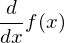

In [266]:
# another way of taking a derivative
x = sym.symbols("x")
f = sym.Function("f")(x)
f.diff()

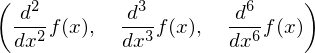

In [267]:
# higher-order derivatives
x = sym.symbols("x")
f = sym.Function("f")(x)
f.diff(x, 2), f.diff(x, 3), f.diff(x, 6)

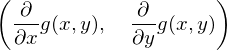

In [268]:
# partial derivatives
x, y = sym.symbols("x, y")
g = sym.Function("g")(x, y)
g.diff(x), g.diff(y)

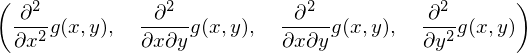

In [269]:
# second-order partial derivatives
x, y = sym.symbols("x, y")
g = sym.Function("g")(x, y)
g.diff(x, 2), g.diff(x,y), g.diff(y,x), g.diff(y,2)

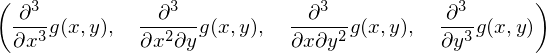

In [270]:
# higher-order partial derivatives
x, y = sym.symbols("x, y")
g = sym.Function("g")(x, y)
g.diff(x, 3), g.diff(x, 2, y), g.diff(x, y, 2), g.diff(y, 3)

### integrate( )

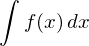

In [278]:
# indefinite integral of an undefined function in one variable
x = sym.symbols("x")
f = sym.Function("f")(x)
sym.integrate(f)

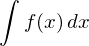

In [279]:
# another way to take an indefinite integral
x = sym.symbols("x")
f = sym.Function("f")(x)
f.integrate()

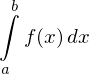

In [285]:
# definite integral of an undefined function in one variable
x, a, b = sym.symbols("x, a, b")
f = sym.Function("f")(x)
f.integrate((x,a,b))

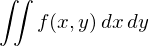

In [289]:
# indefinite multiple integral
x, y = sym.symbols("x, y")
f = sym.Function("f")(x, y)
f.integrate(x, y)

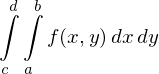

In [290]:
# definite multiple integral
x, y, a, b, c, d = sym.symbols("x, y, a, b, c, d")
f = sym.Function("f")(x, y)
f.integrate((x, a, b), (y, c, d))

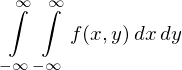

In [294]:
# infinite bounds of integration
oo = sym.oo
x, y = sym.symbols("x, y")
f = sym.Function("f")(x, y)
f.integrate((x, -oo, oo), (y, -oo, oo))

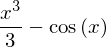

In [299]:
# integrate an expression, indefinite integral
x = sym.symbols("x")
expr = x**2 + sym.sin(x)
expr.integrate()

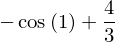

In [300]:
# integrate an expression, definite integral
x = sym.symbols("x")
expr = x**2 + sym.sin(x)
expr.integrate((x,0,1))

### series( )

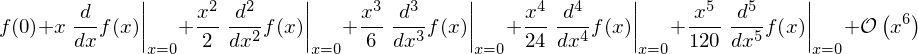

In [301]:
# create a series expansion of an undefined function
x = sym.symbols("x")
f = sym.Function("f")(x)
sym.series(f, x)

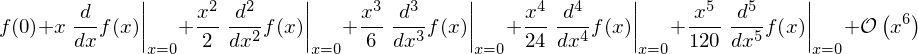

In [302]:
# another way to create a series expansion of an undefined function
x = sym.symbols("x")
f = sym.Function("f")(x)
f.series(x)

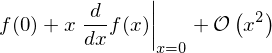

In [308]:
# series expansion to order 2
x = sym.symbols("x")
f = sym.Function("f")(x)
f.series(x, n=2)

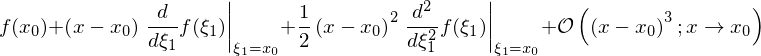

In [313]:
# series expansion around point p
x, x0 = sym.symbols("x, x0")
f = sym.Function("f")(x)
f.series(x, x0, n=3)

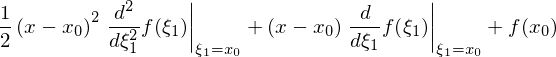

In [316]:
# series with order object removed
x, x0 = sym.symbols("x, x0")
f = sym.Function("f")(x)
f.series(x, x0, n=3).removeO()

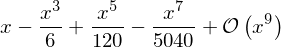

In [319]:
# series expansion of sin(x) around x=0
x = sym.symbols("x")
f = sym.sin(x)
f.series(x, 0, n=9)

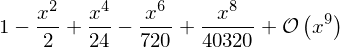

In [320]:
# series expansion of cos(x) around x=0
x = sym.symbols("x")
f = sym.cos(x)
f.series(x, 0, n=9)

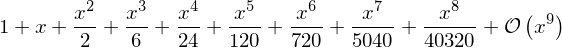

In [321]:
# series expansion of exp(x) around x=0
x = sym.symbols("x")
f = sym.exp(x)
f.series(x, 0, n=9)

In [325]:
# binomial expansion
x = sym.symbols("x")
f = 1/(1 + x)**2
f.series(x, 0, n=9)

### limit( )

In [338]:
# limit of a function
x = sym.symbols("x")
f = sym.sin(x)/x
f.limit(x, 0)

In [339]:
# asymptotic limit of a function
oo = sym.oo
x = sym.symbols("x")
f = sym.sin(x)/x
f.limit(x, oo)

### Derivative( )

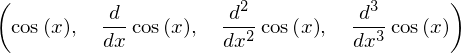

In [263]:
# a formal derivative, delaying its evaluation
x = sym.symbols("x")
f = sym.cos(x)
df = sym.Derivative(f, x)
ddf = sym.Derivative(f, x, 2)
dddf = sym.Derivative(f, x, 3)
f, df, ddf, dddf

### Integral( )

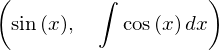

In [341]:
# a formal integral, delaying its evaluation
x = sym.symbols("x")
f = sym.cos(x)
myint = sym.Integral(f, x)
f.integrate(), myint

### Sum( )

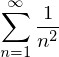

In [347]:
# a formal sum, delaying its evaluation
oo = sym.oo
n = sym.symbols("n", integer=True)
mysum = sym.Sum(1/n**2, (n, 1, oo))
mysum

### Product( )

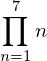

In [348]:
# a formal product, delaying its evaluation
n = sym.symbols("n", integer=True)
myprod = sym.Product(n, (n, 1, 7))
myprod

### doit( )

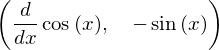

In [343]:
# try to explicitly evaluate a formal derivative
x = sym.symbols("x")
f = sym.cos(x)
df = sym.Derivative(f, x)
df, df.doit()

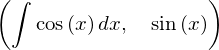

In [342]:
# try to explicitly evaluate a formal integral
x = sym.symbols("x")
f = sym.cos(x)
myint = sym.Integral(f, x)
myint, myint.doit()

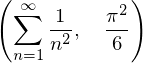

In [349]:
# try to explicitly evaluate a formal sum
oo = sym.oo
n = sym.symbols("n", integer=True)
mysum = sym.Sum(1/n**2, (n, 1, oo))
mysum, mysum.doit()

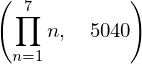

In [350]:
# try to explicitly evaluate a formal sum
n = sym.symbols("n", integer=True)
myprod = sym.Product(n, (n, 1, 7))
myprod, myprod.doit()

## 9. Solving equations <a id='section9'></a>

### solve( )

In [358]:
# try to solve an equation in one unknown variable
x = sym.symbols("x")
expr = x**2 + 2*x - 3
sym.solve(expr)

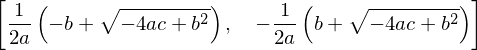

In [359]:
# try to solve an equation containing more than one symbol
x, a, b, c = sym.symbols("x, a, b, c")
expr = a*x**2 + b*x + c
sym.solve(expr, x)

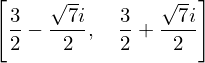

In [360]:
# polynomial with no complex solutions
x, a, b, c = sym.symbols("x, a, b, c")
expr = a*x**2 + b*x + c
vals = {a:1, b:-3, c:4}
sym.solve(expr.subs(vals), x)

In [368]:
# solve a system of equations for more than one unknown
x, y = sym.symbols("x, y")
expr1 = x**2 - y**2 - 4 
expr2 = x**2 + y**2 - 4
solns = sym.solve([expr1, expr2],[x,y])
solns

In [369]:
# solve, returning the solutions in dictionary form
x, y = sym.symbols("x, y")
expr1 = x**2 - y**2 - 4 
expr2 = x**2 + y**2 - 4
solns = sym.solve([expr1, expr2],[x,y], dict=True)
solns

In [377]:
# check solutions using subs()
x, y = sym.symbols("x, y")
expr1 = x**2 - y**2 - 4 
expr2 = x**2 + y**2 - 4
solns = sym.solve([expr1, expr2],[x,y], dict=True)
[expr1.subs(soln) == 0 and expr2.subs(soln) == 0 for soln in solns]

[True, True]

## 10. Linear algebra <a id='section10'></a>

### Matrix( )

In [379]:
# a simple column matrix
sym.Matrix([1,2])

In [380]:
# a simple row matrix
sym.Matrix([[1,2]])

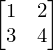

In [381]:
# a simple 2 x 2 matrix
sym.Matrix([[1,2],[3,4]])

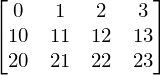

In [383]:
# create a matrix using lambda function of rows and columns
sym.Matrix(3, 4, lambda m, n: 10*m + n)

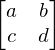

In [385]:
# a symbolic matrix
a, b, c, d = sym.symbols("a, b, c, d")
M = sym.Matrix([[a,b],[c,d]])
M

### Matrix operations

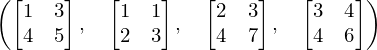

In [389]:
# matrix algebra
A = sym.Matrix([[1,2],[3,4]])
B = sym.Matrix([[0,1],[1,1]])
A+B, A-B, A*B, B*A

In [390]:
# determinant
A = sym.Matrix([[1,2],[3,4]])
A.det()

In [391]:
# trace
A = sym.Matrix([[1,2],[3,4]])
A.trace()

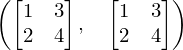

In [392]:
# transpose
A = sym.Matrix([[1,2],[3,4]])
A.transpose(), A.T

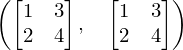

In [394]:
# adjoint
A = sym.Matrix([[1,2],[3,4]])
A.adjoint(), A.H

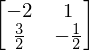

In [395]:
# inverse
A = sym.Matrix([[1,2],[3,4]])
A.inv()

In [403]:
# norm
A = sym.Matrix([[1,2],[3,4]])
A.norm()

In [405]:
# rank
A = sym.Matrix([[1,2],[3,4]])
A.rank()

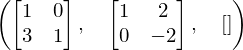

In [396]:
# LU decomposition
A = sym.Matrix([[1,2],[3,4]])
A.LUdecomposition()

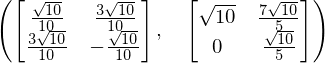

In [406]:
# QR decomposition
A = sym.Matrix([[1,2],[3,4]])
A.QRdecomposition()

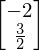

In [410]:
# solve Ax = b
A = sym.Matrix([[1,2],[3,4]])
b = sym.Matrix([1,0])
A.solve(b)

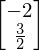

In [408]:
# solve Ax = b, using LU factorization
A = sym.Matrix([[1,2],[3,4]])
b = sym.Matrix([1,0])
A.LUsolve(b)

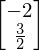

In [411]:
# solve Ax = b, using QR factorization
A = sym.Matrix([[1,2],[3,4]])
b = sym.Matrix([1,0])
A.QRsolve(b)

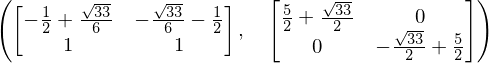

In [412]:
# diagonalize
A = sym.Matrix([[1,2],[3,4]])
A.diagonalize()

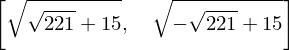

In [413]:
# singular values
A = sym.Matrix([[1,2],[3,4]])
A.singular_values()